In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi=np.pi

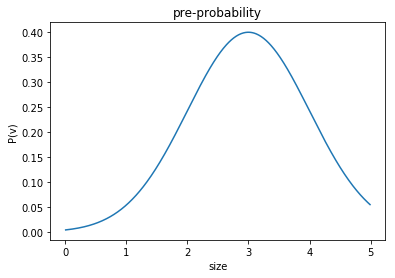

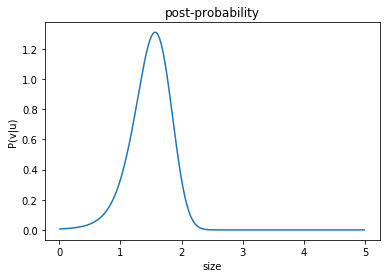

In [2]:
#Exercise 1

u=2
sigma_u=1
v_p=3
sigma_p=1
dx=0.01

x=np.arange(0.01, 5, dx)

def g(v):
    return v**2

def normdist(x, m, sigma):
    return np.exp(-(x-m)**2/(2*sigma))/(2*pi*sigma)**(1/2)

preprobability=normdist(x, v_p, sigma_p)
plt.plot(x, preprobability)
plt.title('pre-probability')
plt.xlabel('size')
plt.ylabel('P(v)')
plt.show()

postprobability=normdist(u, g(x), sigma_u)*preprobability
postprobability/=np.sum(postprobability*dx)
plt.plot(x, postprobability)
plt.title('post-probability')
plt.xlabel('size')
plt.ylabel('P(v|u)')
plt.show()

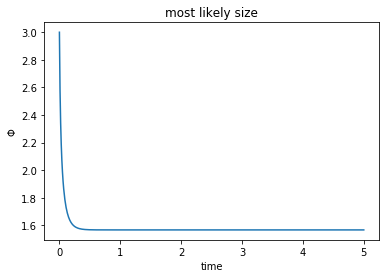

In [3]:
#Exercise 2
#長さvのものは感覚器にてu=v^2として観測される
def g(v):
    return v**2

#gをphiで微分
def dgdphi(v):
    return 2*v

#Fをphiで微分
def dFdphi(v_p, sigma_p, sigma_u, phi, u):
    grad=(u-g(phi))*dgdphi(phi)/sigma_u+(v_p-phi)/sigma_p
    return grad

#setting
u=2
v_p=3
sigma_p=1
sigma_u=1
phi=v_p
dt=0.01
time=5

log=[]
log.append(phi)

for i in range(np.int(time/dt)):
    phi=phi+dt*dFdphi(v_p, sigma_p, sigma_u, phi, u)
    log.append(phi)

plt.plot(np.arange(0, len(log)*dt, dt), log)
plt.xlabel('time')
plt.ylabel('Φ')
plt.title('most likely size')
plt.show()

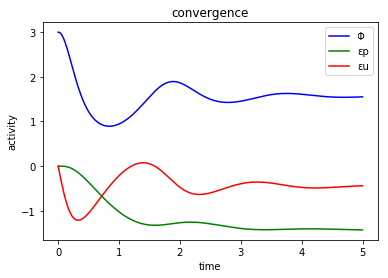

In [4]:
#Exercise 3

#setting
u=2
v_p=3
phi=[v_p,]
ep=[0,]
eu=[0,]
sigma_p=1
sigma_u=1
dt=0.01
time=5

def g(phi):
    return phi**2

def dgdphi(phi):
    return 2*phi

def d_phi(eu, phi, ep):
    return eu*dgdphi(phi)-ep

def d_ep(phi, v_p, sigma_p, ep):
    return phi-v_p-sigma_p*ep

def d_eu(u, phi, sigma_u, eu):
    return u-g(phi)-sigma_u*eu

for i in range(np.int(time/dt)):
    temp_phi=phi[-1]+dt*d_phi(eu[-1], phi[-1], ep[-1])
    temp_ep=ep[-1]+dt*d_ep(phi[-1], v_p, sigma_p, ep[-1])
    temp_eu=eu[-1]+dt*d_eu(u, phi[-1], sigma_u, eu[-1])
    
    phi.append(temp_phi)
    ep.append(temp_ep)
    eu.append(temp_eu)

x=np.arange(0, time+dt, dt)

plt.plot(x, phi, 'b', label='Φ')
plt.plot(x, ep, 'g', label='εp')
plt.plot(x, eu, 'r', label='εu')
plt.legend()
plt.xlabel('time')
plt.ylabel('activity')
plt.title('convergence')
plt.show()

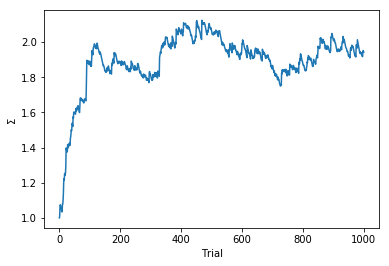

In [5]:
#Exercise 5

def g():
    return 5

m_phi=5
v_phi=2
learning_rate=0.01
dt=0.01
time=20
Trial=1000
sigma_i=[]
sigma_i.append(1)

for T in range(Trial):
    e_i=0
    ep_i=0
    phi_i=np.sqrt(v_phi)*np.random.randn(1)+m_phi
    sigma_temp=sigma_i[-1]
  
    for t in range(np.int(time/dt)):
        dep_i=phi_i-g()-e_i
        de_i=sigma_temp*ep_i-e_i
      
        ep_i=ep_i+dep_i*dt
        e_i=e_i+de_i*dt
  
    sigma_i.append(sigma_temp+learning_rate*(ep_i*e_i-1))

x=np.arange(0, len(sigma_i), 1)
plt.plot(x, sigma_i)
plt.xlabel('Trial')
plt.ylabel('Σ')
plt.show()